## Data Overview

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# load the dataset
train = pd.read_csv('train.tsv', sep='\t')
test = pd.read_csv('test.tsv', sep='\t')
train.head()

,embedding_x,embedding_y,equal
0,"0.35198048,0.23884374,0.20589112,0.033522803,0...","0.124149986,0.14133812,0.16054663,0.38359353,0...",1
1,"0.3492841,-0.18005244,0.46332806,-0.2122336,0....","-0.7460901,-0.21427503,-0.14653064,-0.22343078...",0
2,"0.5642844,-0.08399645,-0.018092873,0.18461637,...","-0.30552676,0.10498648,0.40437204,0.25560898,-...",0
3,"0.36132073,-0.20658037,0.4909494,0.12876663,0....","0.25936005,-0.15755327,0.4929783,-0.11315008,0...",1
4,"-0.039740197,-0.11732757,-0.07907649,0.1649697...","0.26061502,-0.31516105,-0.04165541,0.16747917,...",1


## Data Preprocessing

In [2]:
# convert strings to lists of floats
train.embedding_x = [[float(j) for j in i] for i in train.embedding_x.str.split(',')]
train.embedding_y = [[float(j) for j in i] for i in train.embedding_y.str.split(',')]
test.embedding_x = [[float(j) for j in i] for i in test.embedding_x.str.split(',')]
test.embedding_y = [[float(j) for j in i] for i in test.embedding_y.str.split(',')]

# calculate Euclidean distance in the dataset
train['distance'] = [np.linalg.norm(np.array(train.embedding_x[_]) - np.array(train.embedding_y[_])) for _ in range(len(train.embedding_x))]
test['distance'] = [np.linalg.norm(np.array(test.embedding_x[_]) - np.array(test.embedding_y[_])) for _ in range(len(test.embedding_x))]
train.head()

,embedding_x,embedding_y,equal,distance
0,"[0.35198048, 0.23884374, 0.20589112, 0.0335228...","[0.124149986, 0.14133812, 0.16054663, 0.383593...",1,0.941026
1,"[0.3492841, -0.18005244, 0.46332806, -0.212233...","[-0.7460901, -0.21427503, -0.14653064, -0.2234...",0,1.629176
2,"[0.5642844, -0.08399645, -0.018092873, 0.18461...","[-0.30552676, 0.10498648, 0.40437204, 0.255608...",0,1.598868
3,"[0.36132073, -0.20658037, 0.4909494, 0.1287666...","[0.25936005, -0.15755327, 0.4929783, -0.113150...",1,0.674878
4,"[-0.039740197, -0.11732757, -0.07907649, 0.164...","[0.26061502, -0.31516105, -0.04165541, 0.16747...",1,1.053113


In [3]:
test.head()

,embedding_x,embedding_y,equal,distance
0,"[0.297163, -0.19147852, 0.514213, 0.11966697, ...","[0.33785084, -0.16910027, -0.1574438, -0.02361...",0,1.389626
1,"[0.28278404, -0.21183152, 0.3420205, -0.230233...","[0.297163, -0.19147852, 0.514213, 0.11966697, ...",1,0.784561
2,"[0.50050944, -0.07608504, 0.1397811, 0.1756001...","[0.40801406, 0.10747076, 0.3100398, 0.04043074...",1,1.010369
3,"[0.18524958, -0.23291345, 0.47159392, 0.213189...","[-0.04595025, -0.4184819, -0.3319743, -0.18005...",1,1.340018
4,"[0.3160543, -0.12296223, 0.27941337, 0.2727139...","[0.40801406, 0.10747076, 0.3100398, 0.04043074...",1,1.050714


## Model Fitting

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# divide data into training and test subsets
X_train = train.drop(['embedding_x', 'embedding_y', 'equal'], axis=1)
y_train = train.equal
X_test = test.drop(['embedding_x', 'embedding_y', 'equal'], axis=1)
y_test = test.equal

# accuracy score of the classifier
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
clf_predictions = clf.predict(X_test)
accuracy_score(y_test, clf_predictions)

0.892252437147255

## Visualization

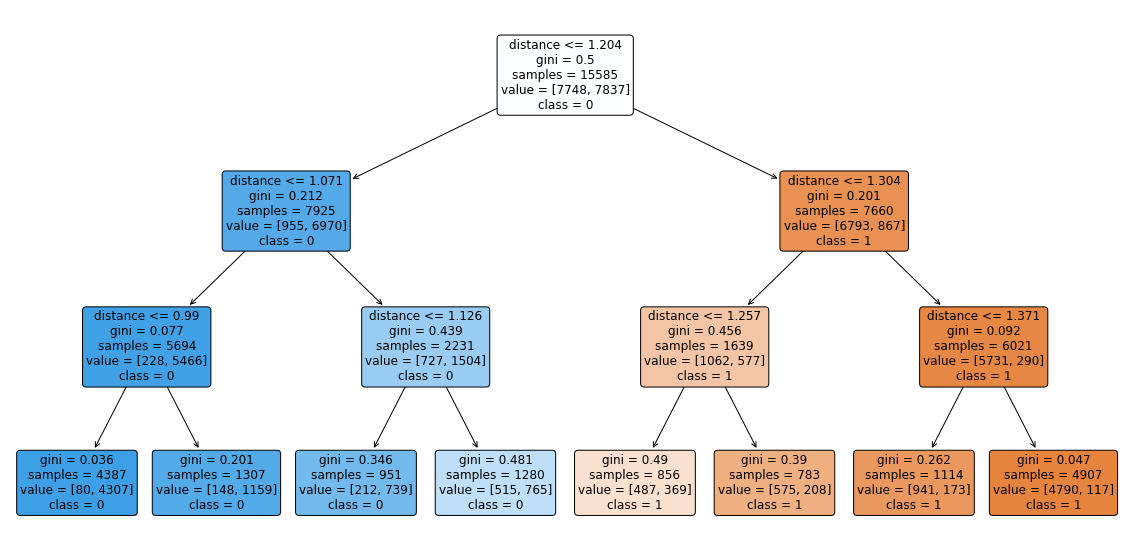

In [5]:
from matplotlib import pyplot as plt
from sklearn import tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=list(X_train), class_names=['1', '0'], filled=True, rounded=True, fontsize = 12)
plt.show()

## Conclusion

As wee can see above, 1.204 - is the best threshold for this dataset.